In [1]:
import gravipy as gp
import glob
from astropy.io import fits
import numpy as np

In [2]:
f = 'data/GRAVI.2022-08-17T00:08:55.346_dualscivis_science_dualsciviscalibrated.fits'
date = fits.open(f)[0].header['DATE-OBS']

# SgrA* pointing
## find star positions

In [3]:
o = gp.GCorbits()

Stars with orbits:
['S1', 'S2', 'S4', 'S8', 'S9', 'S12', 'S13', 'S14', 'S17', 'S18', 'S19', 'S21', 'S23', 'S24', 'S29', 'S31', 'S33', 'S38', 'S42', 'S55', 'S60', 'S66', 'S67', 'S71', 'S83', 'S85', 'S87', 'S89', 'S91', 'S96', 'S97', 'S145', 'S175', 'R34', 'R44']

Stars with proper motions:
['S7', 'S10', 'S11', 'S20', 'S22', 'S25', 'S26', 'S27', 'S30', 'S32', 'S34', 'S35', 'S36', 'S37', 'S41', 'S43', 'S45', 'S46', 'S47', 'S50', 'S51', 'S52', 'S53', 'S56', 'S57', 'S59', 'S62', 'S63', 'S65', 'S68', 'S95', 'S300', 'S5', 'S6', 'S28', 'S39', 'S44', 'S48', 'S58', 'S64', 'S82']


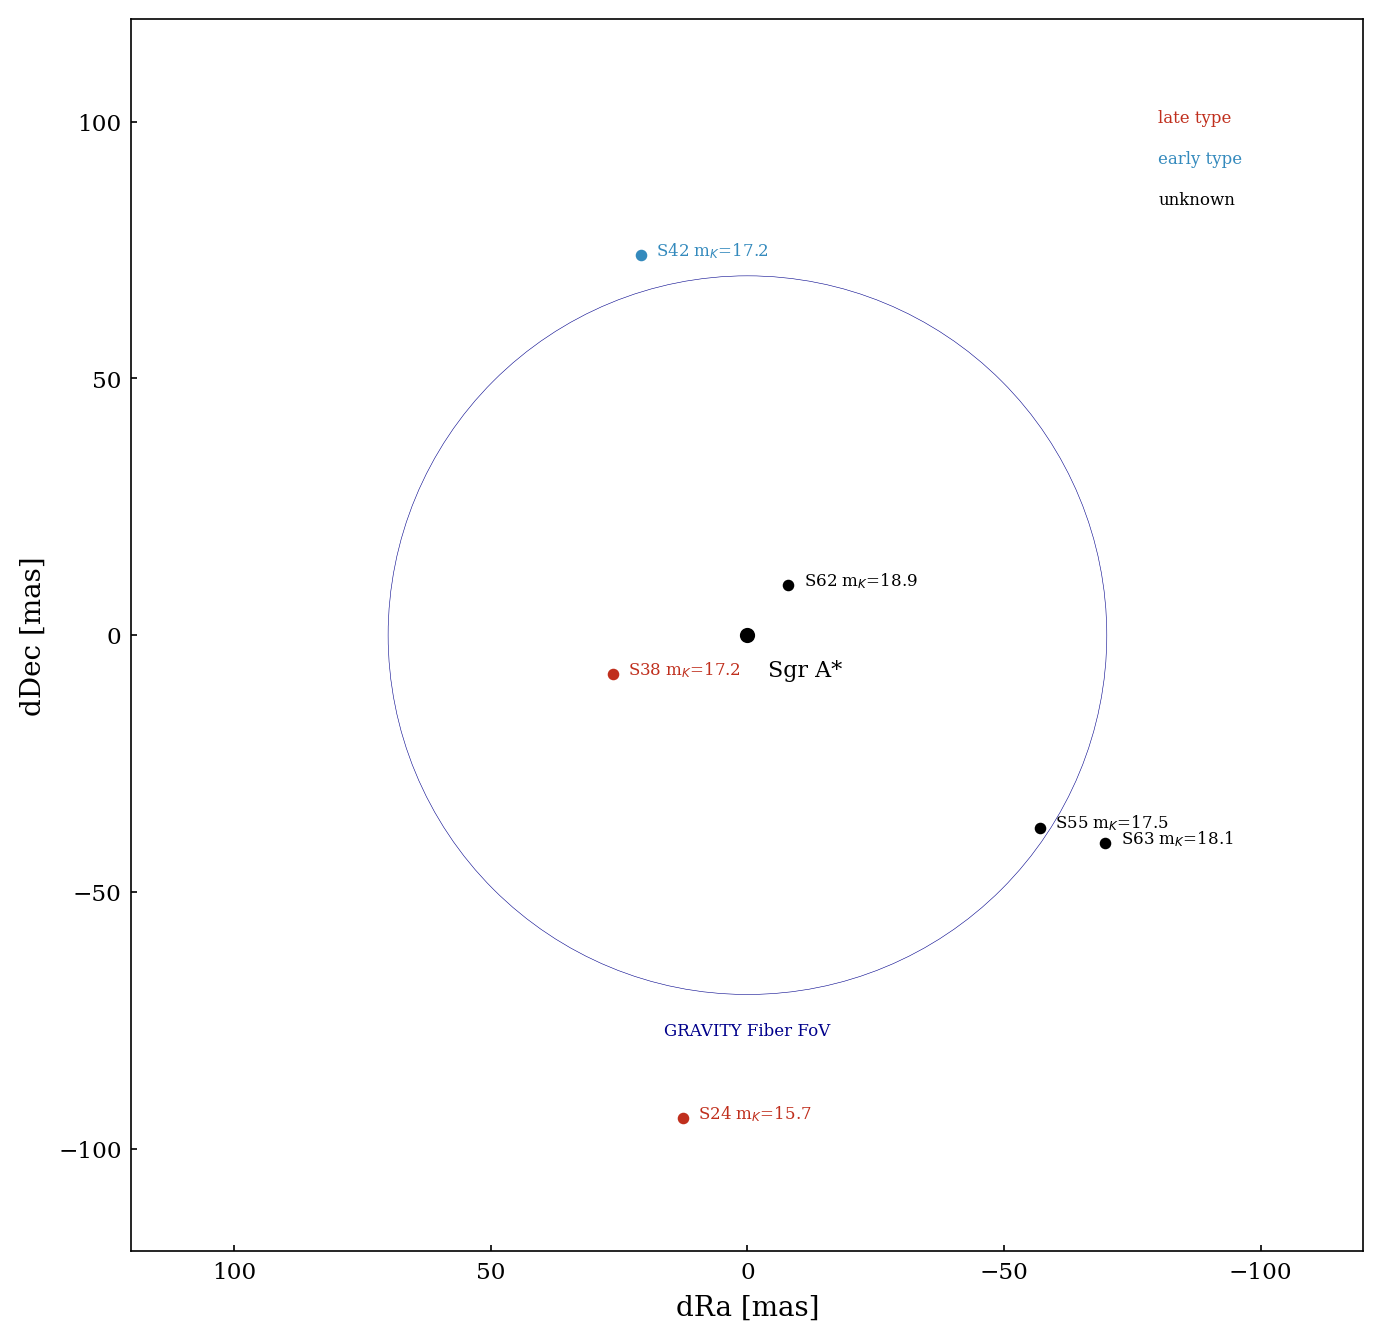

In [4]:
o.plot_orbits(t=date, long=True)

**-> S38, S55 and S62 in the field**

In [5]:
t = gp.convert_date(date)[0]

# get positions
s38 = o.pos_orbit('S38', t)*1e3
s55 = o.pos_orbit('S55', t)*1e3
s62 = o.pos_pm('S62', t)*1e3

# get flux ratios, always relative to brightest star in field (here: S38)
s62s38 = 10**(-0.4*(o.star_pms['S62']['Kmag'] - o.star_orbits['S38']['Kmag']))
s55s38 = 10**(-0.4*(o.star_orbits['S55']['Kmag'] - o.star_orbits['S38']['Kmag']))

## Fitting

In [6]:
# Most likely phasemaps are not available for you, so you will need to create them first
# they are saved in gravipy, but as they are big, they are not part of the release

# To create them uncomment the next two lines
# fi = gp.GravMFit(f)
# fi.create_phasemaps()

NDIT = 1
Run MCMC for DIT 1
using channels from #3 to #13
Run MCMC for Pol 1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 150/150 [00:29<00:00,  5.15it/s]

---------------------------------------
Mean acceptance fraction: 0.41
---------------------------------------


ndof: 47
red. chi2 for visamp: 1.71
red. chi2 for vis2: 1.50
red. chi2 for visphi: 2.95
red. chi2 for closure: 2.92


-----------------------------------
Best chi2 result:
dRA1 = 25.699
dDEC1 = -5.959
dRA2 = -56.935
dDEC2 = -36.454
fr2 = -0.544
fr3 = -2.332
alpha BH = -2.242
f BG = 2.363
pc RA = 0.108
pc Dec = 0.280
fr BH = -0.015


MCMC Result:
dRA1 = 25.755 + 0.507 - 0.079
dDEC1 = -6.184 + 0.225 - 1.161
dRA2 = -57.680 + 0.702 - 0.437
dDEC2 = -36.466 + 0.253 - 0.977
fr2 = -0.731 + 0.530 - 0.436
fr3 = -1.481 + 0.679 - 0.424
alpha BH = -3.433 + 0.505 - 0.494
f BG = 2.078 + 0.321 - 0.847
pc RA = 0.177 + 0.106 - 0.097
pc Dec = 0.156 + 0.093 - 0.163
fr BH = -0.050 + 0.035 - 0.164
-----------------------------------
Run MCMC for Pol 2



/home/felix/Python_Modules/gravipy/src/gravipy/gravmfit.py:1824: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fittab = fittab.append(_fittab, ignore_index=True)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 150/150 [00:47<00:00,  3.14it/s]
/home/felix/Python_Modules/gravipy/src/gravipy/gravmfit.py:1824: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fittab = fittab.append(_fittab, ignore_index=True)


---------------------------------------
Mean acceptance fraction: 0.41
---------------------------------------


ndof: 48
red. chi2 for visamp: 3.59
red. chi2 for vis2: 2.53
red. chi2 for visphi: 3.55
red. chi2 for closure: 6.70


-----------------------------------
Best chi2 result:
dRA1 = 25.579
dDEC1 = -5.815
dRA2 = -59.014
dDEC2 = -33.853
fr2 = -1.263
fr3 = -2.124
alpha BH = -3.589
f BG = 1.797
pc RA = 0.169
pc Dec = 0.073
fr BH = -0.116


MCMC Result:
dRA1 = 25.578 + 0.614 - 0.065
dDEC1 = -6.062 + 0.179 - 1.321
dRA2 = -56.040 + 0.465 - 0.846
dDEC2 = -37.893 + 0.446 - 0.453
fr2 = -0.612 + 0.451 - 0.587
fr3 = -1.158 + 0.387 - 0.457
alpha BH = -4.456 + 0.412 - 0.332
f BG = 1.327 + 0.308 - 0.271
pc RA = 0.115 + 0.062 - 0.068
pc Dec = 0.189 + 0.104 - 0.128
fr BH = -0.174 + 0.030 - 0.103
-----------------------------------


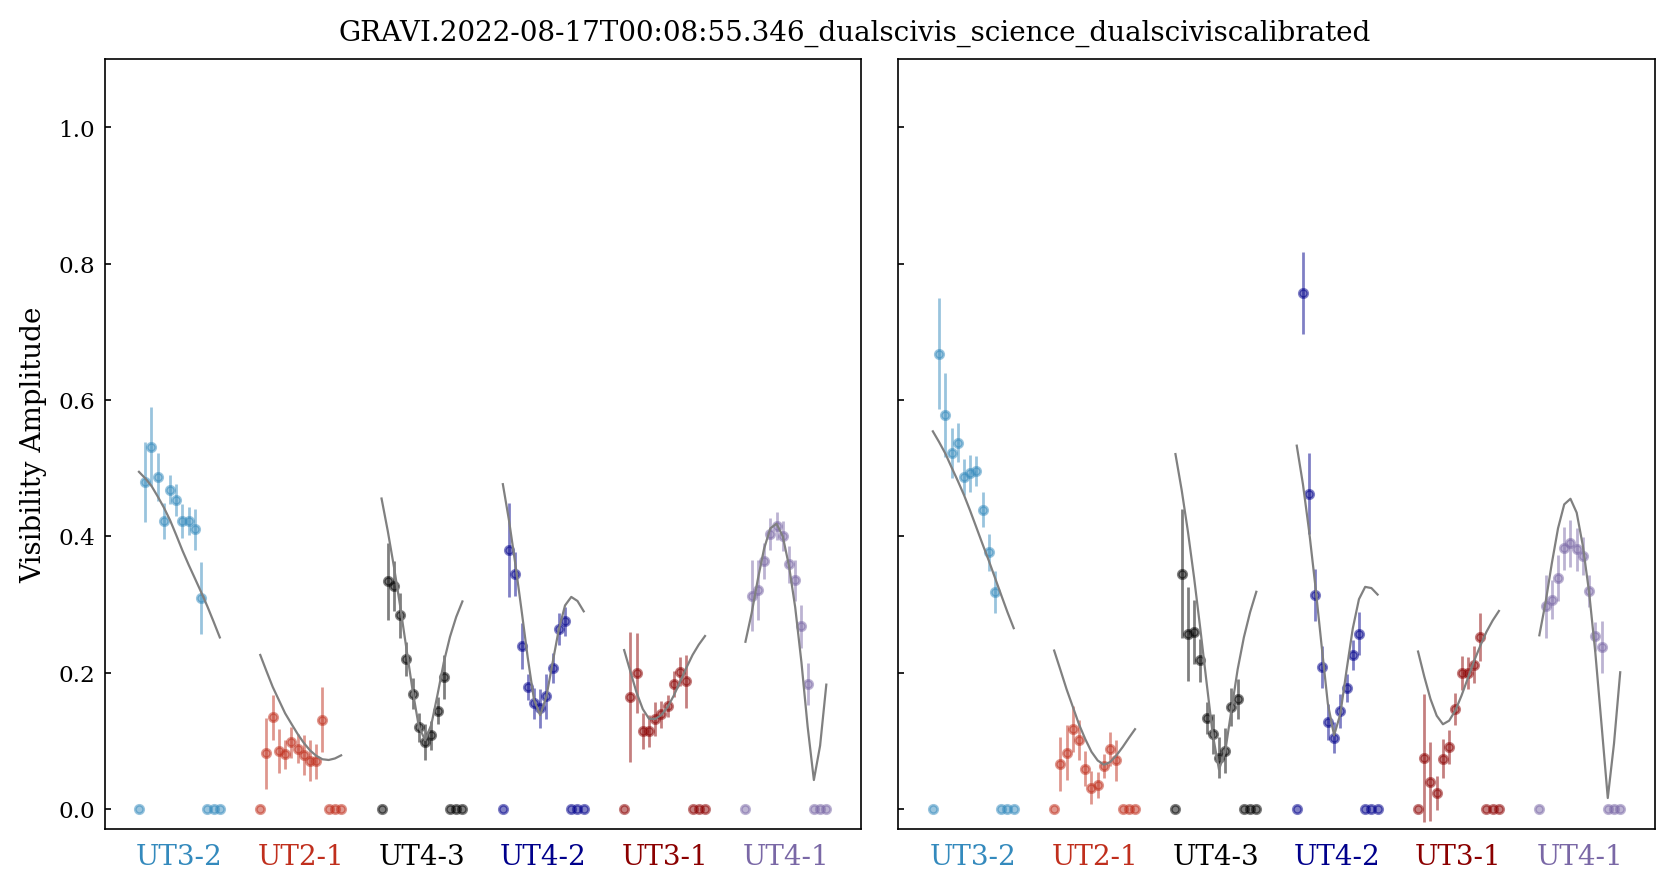

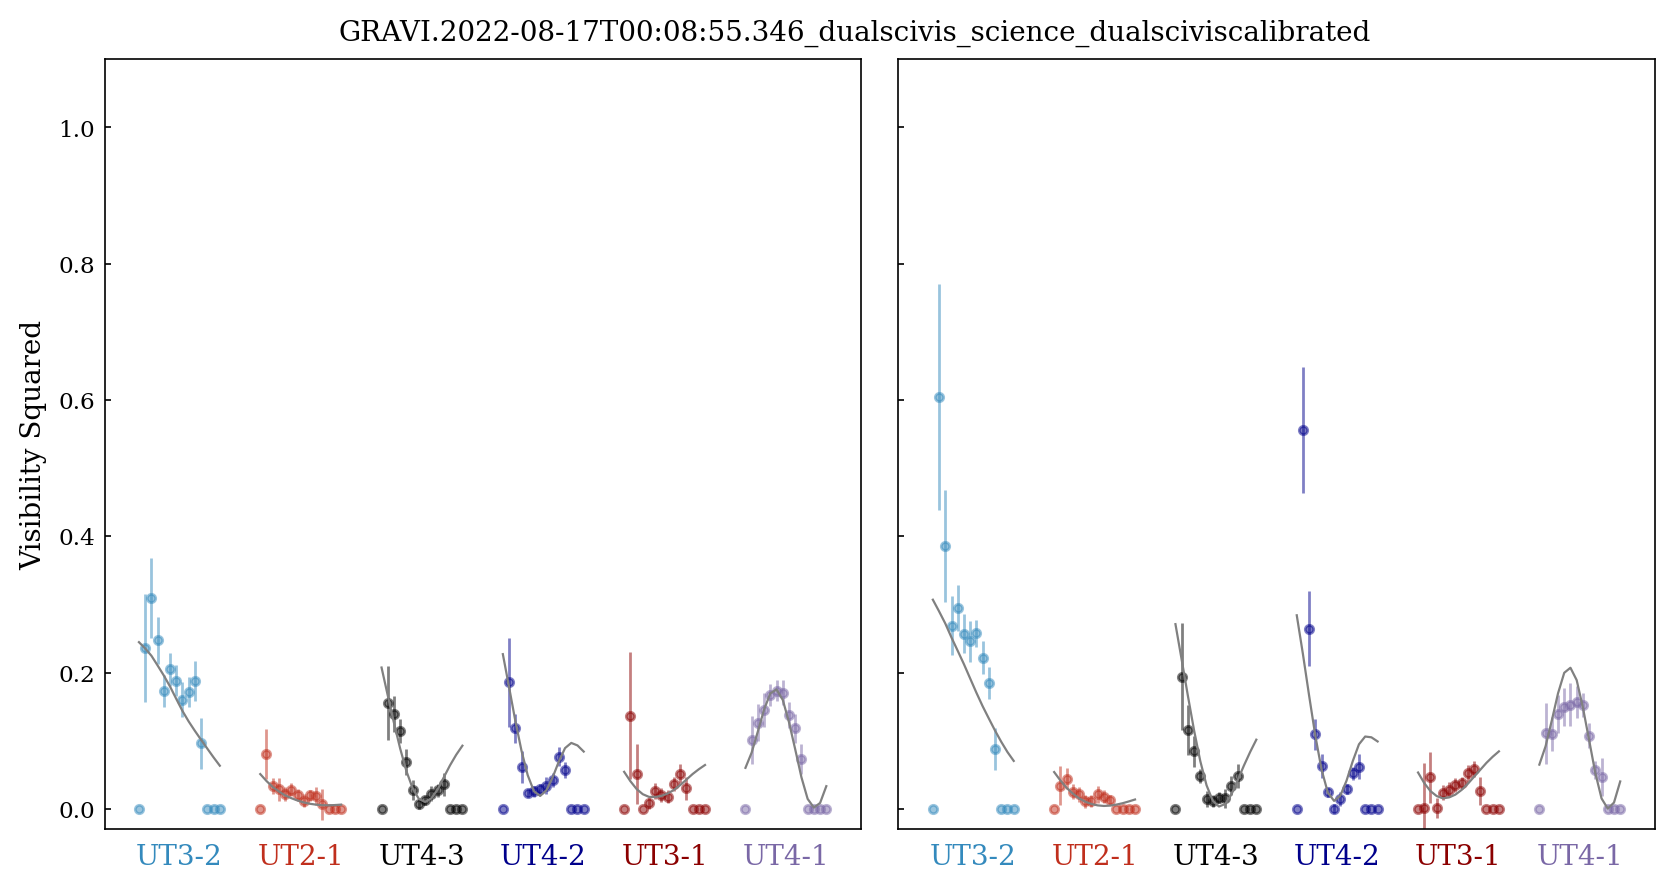

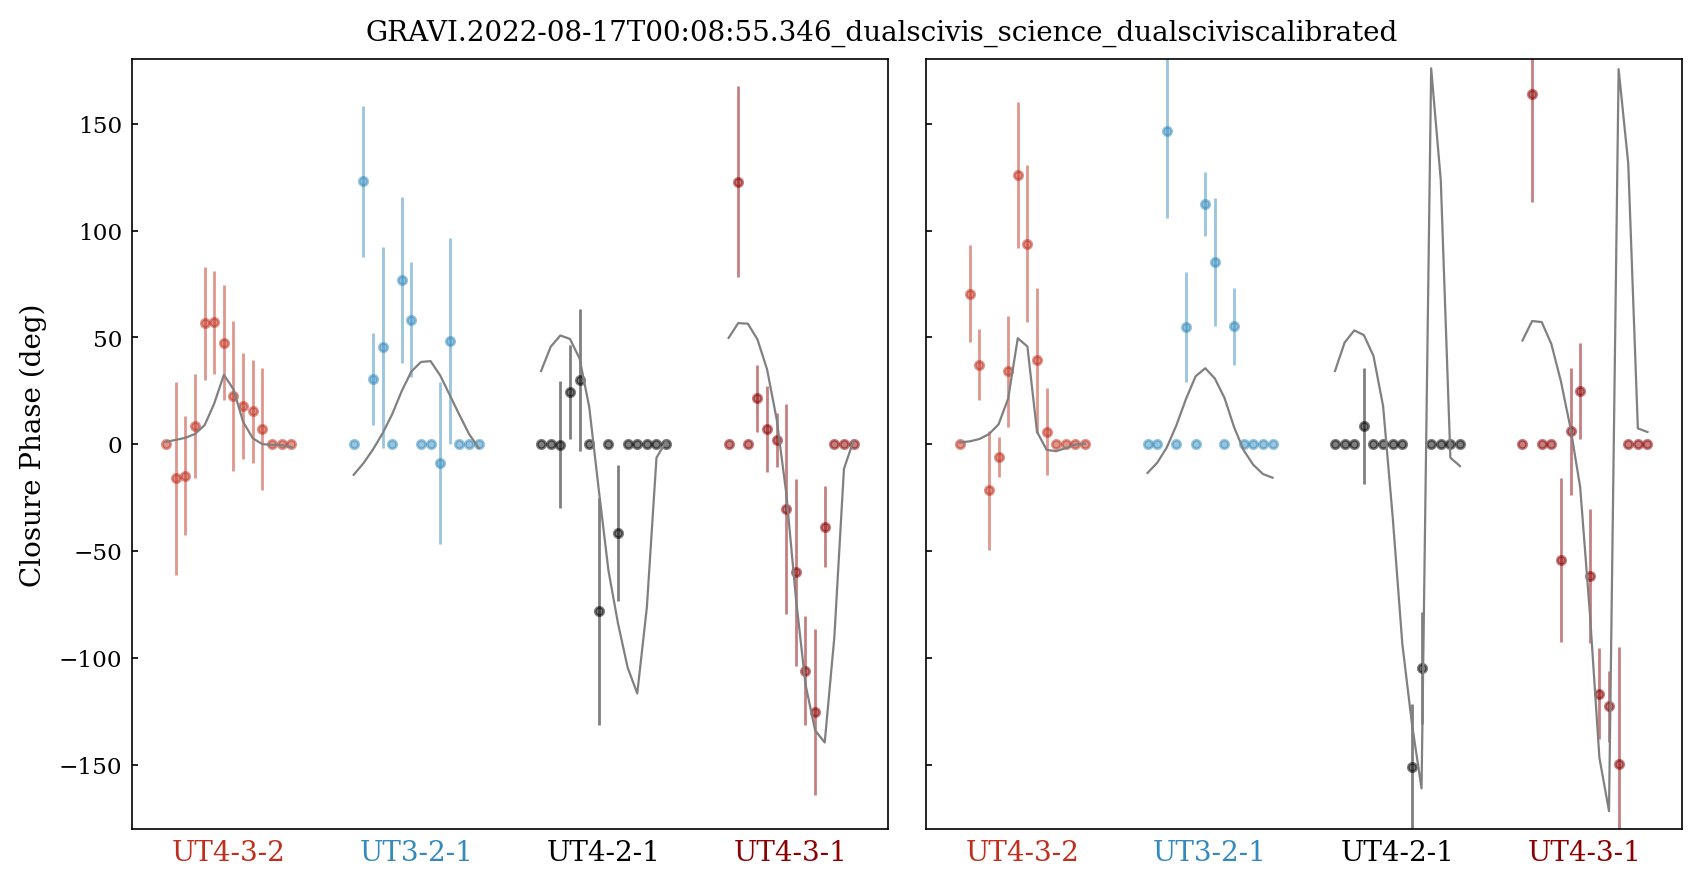

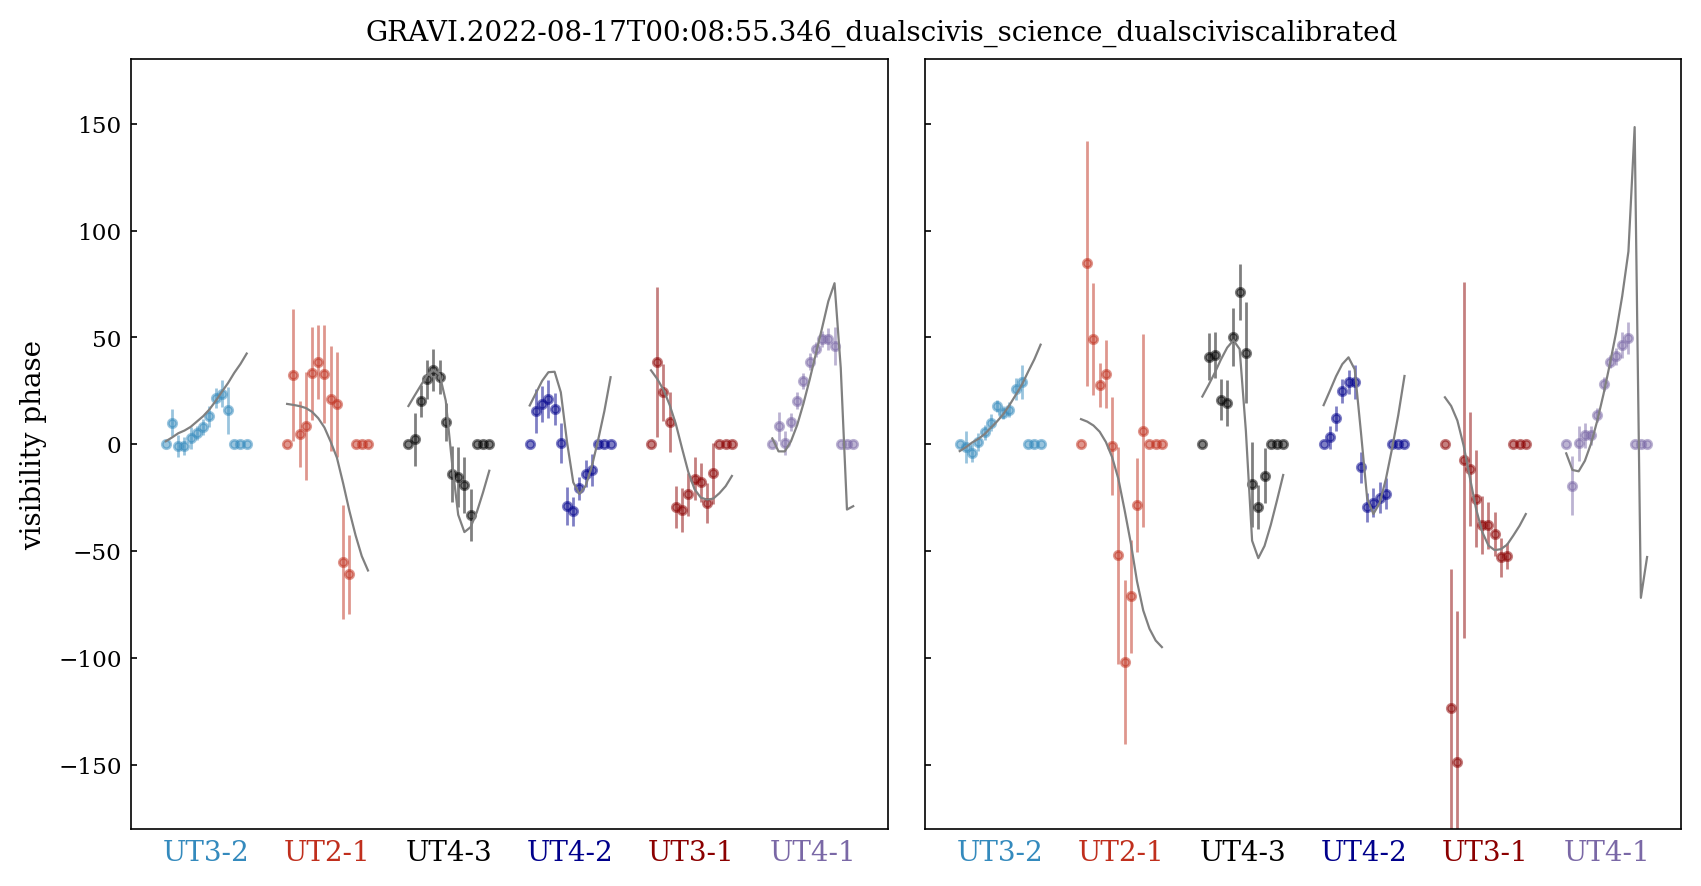

Combined red. chi2 of fitted data: 25.449


[array([ 2.56986556e+01, -5.95933119e+00, -5.69353010e+01, -3.64536352e+01,
        -5.43887625e-01, -2.33173360e+00, -2.24169376e+00,  2.36318125e+00,
         1.08453093e-01,  2.79691733e-01, -1.52353205e-02]),
 array([ 25.57917207,  -5.81454963, -59.01424097, -33.85258648,
         -1.26332477,  -2.12419191,  -3.58918222,   1.79696963,
          0.16859717,   0.07293307,  -0.11583888])]

In [7]:
star_pos_ra = [s38[0], s55[0], s62[0]]  # list of RA of stars
star_pos_de = [s38[1], s55[1], s62[1]]  # list of Dec of stars
star_flux_ratio = [s55s38, s62s38]      # list of flux ratios relativ to first star, 1 shorter than other lists

fi = gp.GravMFit(f)
fi.fit_stars(
    star_pos_ra,
    star_pos_de,
    star_flux_ratio,
    fit_pos=[True, True, False], # S62 is usually too faint to fit the position
    fit_for=[1,1,1,1], # fitting for all quantities here: VisAmp, V2, Closure Phase, & Visibility Phase
    nthreads=4,
    nwalkers=100,
    nruns=150,
    initial=[-4, 1,    # initial conditions for: alpha SgrA*, background flux ratio
             0, 0,     # initial conditions for: Phase center Ra, Dec
             0.5 , 1], # initial conditions for: background central/primary source, coherence loss
    plotScience=True)

In [8]:
# Results
# Columns are:
# 0 inpur P1, 1: most likely solution P1, 2: most prob. solution P1, 3 & 4: +- 1 sigma
# 5-9 same for P2
# not fitted values have an error of 0
fi.fittab

,column,dRA1,dDEC1,dRA2,dDEC2,fr2,dRA3,dDEC3,fr3,alpha BH,...,pc RA,pc Dec,fr BH,CL1,CL2,CL3,CL4,CL5,CL6,chi2
0,in P0_0,26.276986,-7.621966,-56.935556,-37.553068,-0.144294,-7.95739,9.77151,-0.674797,-4.000000,...,0.000000,0.000000,-0.301030,1.0,1.0,1.0,1.0,1.0,1.0,1.714646
1,M.L. P0_0,25.698656,-5.959331,-56.935301,-36.453635,-0.543888,-7.95739,9.77151,-2.331734,-2.241694,...,0.108453,0.279692,-0.015235,1.0,1.0,1.0,1.0,1.0,1.0,1.499676
2,M.P. P0_0,25.755286,-6.184168,-57.679919,-36.466392,-0.730619,-7.95739,9.77151,-1.480733,-3.433145,...,0.176907,0.155565,-0.050210,1.0,1.0,1.0,1.0,1.0,1.0,2.921435
3,$-\sigma$ P0_0,0.078664,1.160572,0.436852,0.976543,0.436210,0.00000,0.00000,0.423521,0.493895,...,0.097249,0.163047,0.164084,0.0,0.0,0.0,0.0,0.0,0.0,2.946761
4,$+\sigma$ P0_0,0.507465,0.224561,0.702201,0.253158,0.529676,0.00000,0.00000,0.678896,0.505472,...,0.105922,0.093365,0.035369,0.0,0.0,0.0,0.0,0.0,0.0,NaN
5,in P1_0,26.276986,-7.621966,-56.935556,-37.553068,-0.144294,-7.95739,9.77151,-0.674797,-4.000000,...,0.000000,0.000000,-0.301030,1.0,1.0,1.0,1.0,1.0,1.0,3.593385
6,M.L. P1_0,25.579172,-5.814550,-59.014241,-33.852586,-1.263325,-7.95739,9.77151,-2.124192,-3.589182,...,0.168597,0.072933,-0.115839,1.0,1.0,1.0,1.0,1.0,1.0,2.529931
7,M.P. P1_0,25.577735,-6.061791,-56.040237,-37.892566,-0.611564,-7.95739,9.77151,-1.158500,-4.455561,...,0.115020,0.188517,-0.174108,1.0,1.0,1.0,1.0,1.0,1.0,6.696908
8,$-\sigma$ P1_0,0.064720,1.321163,0.846345,0.453300,0.587483,0.00000,0.00000,0.457412,0.331929,...,0.068404,0.127600,0.102580,0.0,0.0,0.0,0.0,0.0,0.0,3.546218
9,$+\sigma$ P1_0,0.613581,0.178656,0.465194,0.446266,0.450665,0.00000,0.00000,0.386735,0.411961,...,0.062432,0.103713,0.029780,0.0,0.0,0.0,0.0,0.0,0.0,NaN


# Pointing not on SgrA*

In [9]:
f = 'data/GRAVI.2022-05-23T04:32:18.360_dualscivis_science_dualsciviscalibrated.fits'

In [10]:
date = fits.open(f)[0].header['DATE-OBS']
off = fits.open(f)[0].header['ESO INS SOBJ OFFX'], fits.open(f)[0].header['ESO INS SOBJ OFFY']

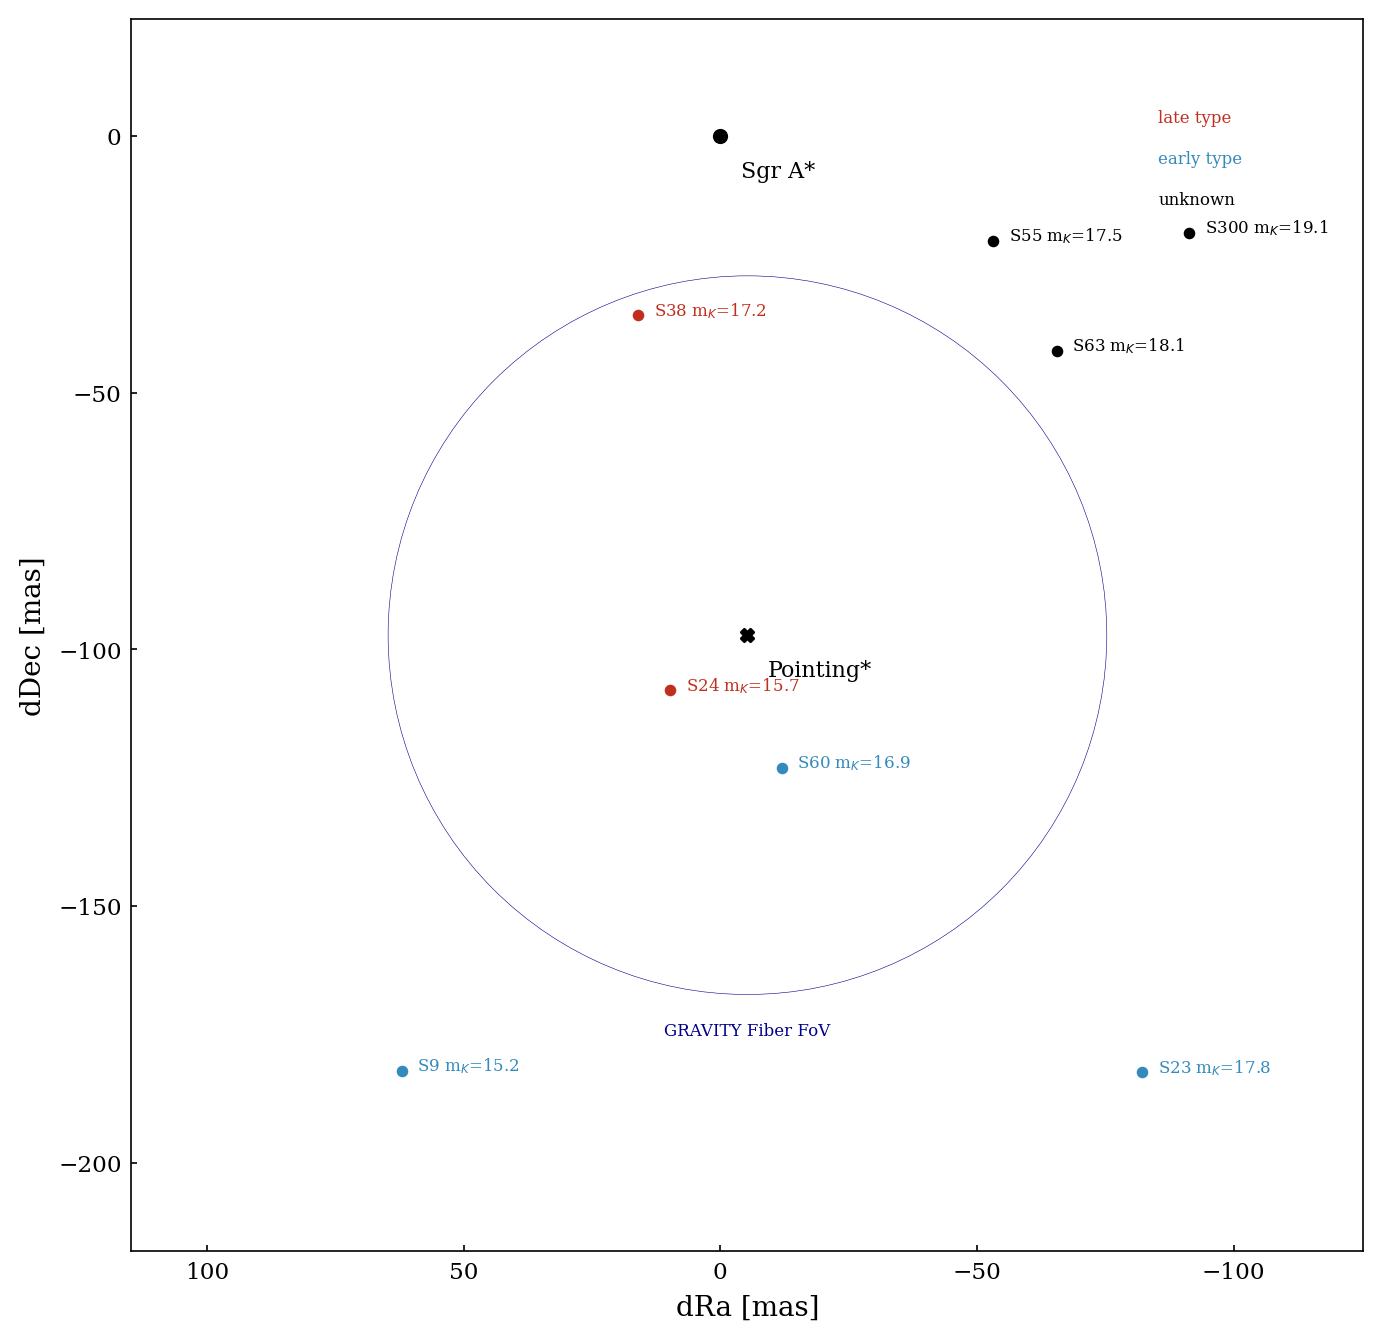

In [11]:
o.plot_orbits(t=date, long=True, off=off)

**-> S60 and S24 in the field**

Now we have two sources and no black hole. The code will assume the central source as the black hole and the other star as the primary star

In [12]:
t = gp.convert_date(date)[0]

# get positions
s60 = o.pos_orbit('S60', t)*1e3
s24 = o.pos_orbit('S24', t)*1e3
sep = s60 - s24

# get flux ratios, always relative to brightest star in field (here: S38)
s60s24 = 10**(-0.4*(o.star_orbits['S60']['Kmag'] - o.star_orbits['S24']['Kmag']))

# Phase center is distance from pointing to central sourse
pc = s24 - np.array(off)

NDIT = 1
Run MCMC for DIT 1
using channels from #3 to #13
Run MCMC for Pol 1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 150/150 [00:17<00:00,  8.61it/s]

---------------------------------------
Mean acceptance fraction: 0.34
---------------------------------------


ndof: 53
red. chi2 for visamp: 6.47
red. chi2 for vis2: 7.63
red. chi2 for visphi: 3.20
red. chi2 for closure: 1.74


-----------------------------------
Best chi2 result:
dRA1 = -21.749
dDEC1 = -16.062
alpha BH = 3.504
f BG = 0.582
pc RA = 15.479
pc Dec = -10.969
fr BH = 0.431


MCMC Result:
dRA1 = -21.741 + 0.108 - 0.195
dDEC1 = -15.871 + 0.812 - 0.190
alpha BH = 2.876 + 0.292 - 0.228
f BG = 0.876 + 0.501 - 0.247
pc RA = 15.476 + 0.040 - 0.376
pc Dec = -10.976 + 0.186 - 0.081
fr BH = 0.456 + 0.084 - 0.768
-----------------------------------
Run MCMC for Pol 2



/home/felix/Python_Modules/gravipy/src/gravipy/gravmfit.py:1824: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fittab = fittab.append(_fittab, ignore_index=True)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 150/150 [00:17<00:00,  8.61it/s]
/home/felix/Python_Modules/gravipy/src/gravipy/gravmfit.py:1824: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fittab = fittab.append(_fittab, ignore_index=True)


---------------------------------------
Mean acceptance fraction: 0.31
---------------------------------------


ndof: 53
red. chi2 for visamp: 5.31
red. chi2 for vis2: 5.96
red. chi2 for visphi: 3.83
red. chi2 for closure: 2.59


-----------------------------------
Best chi2 result:
dRA1 = -21.641
dDEC1 = -16.149
alpha BH = 3.373
f BG = 0.542
pc RA = 15.493
pc Dec = -10.995
fr BH = 0.445


MCMC Result:
dRA1 = -21.787 + 0.143 - 0.222
dDEC1 = -15.657 + 0.664 - 0.442
alpha BH = 2.786 + 0.404 - 0.327
f BG = 0.769 + 0.672 - 0.285
pc RA = 15.449 + 0.087 - 0.521
pc Dec = -10.980 + 0.344 - 0.054
fr BH = 0.461 + 0.146 - 1.169
-----------------------------------


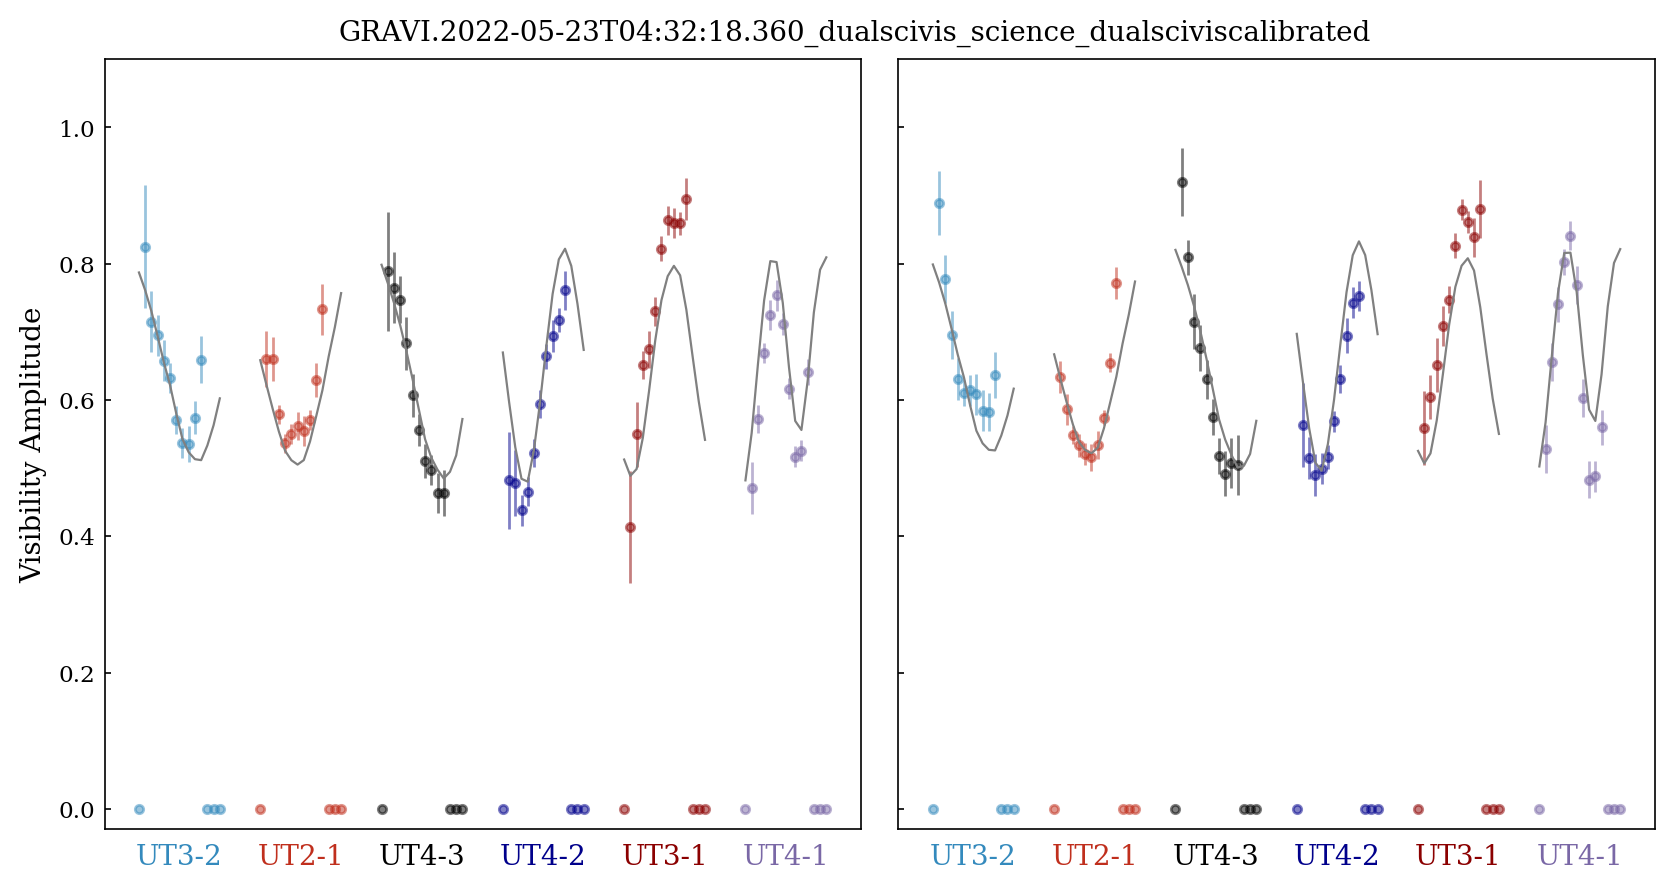

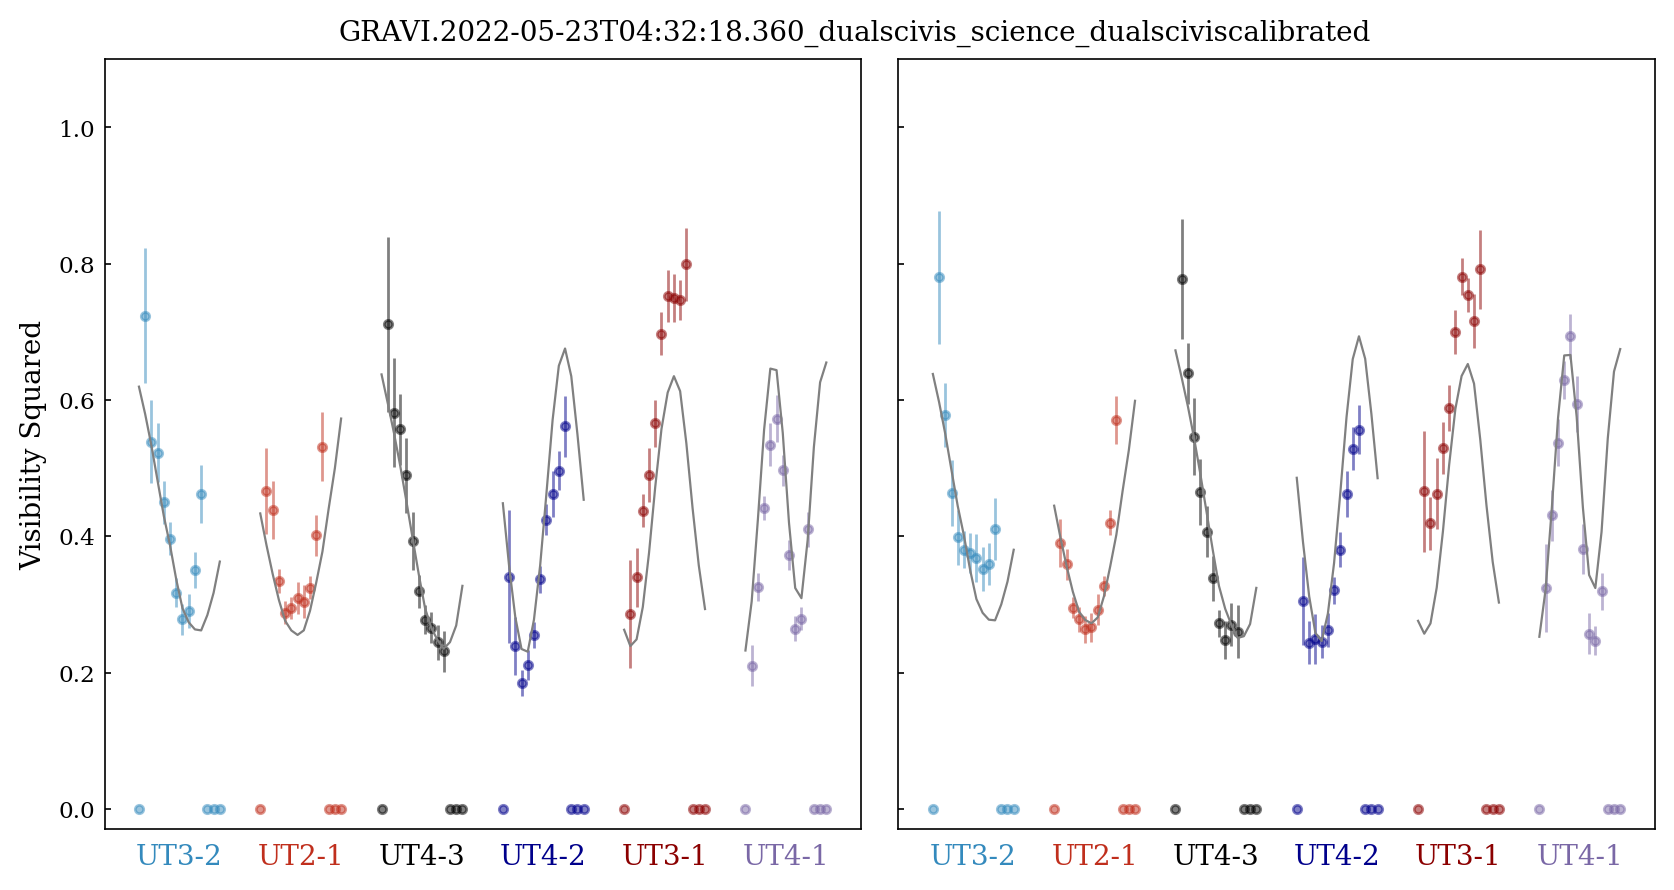

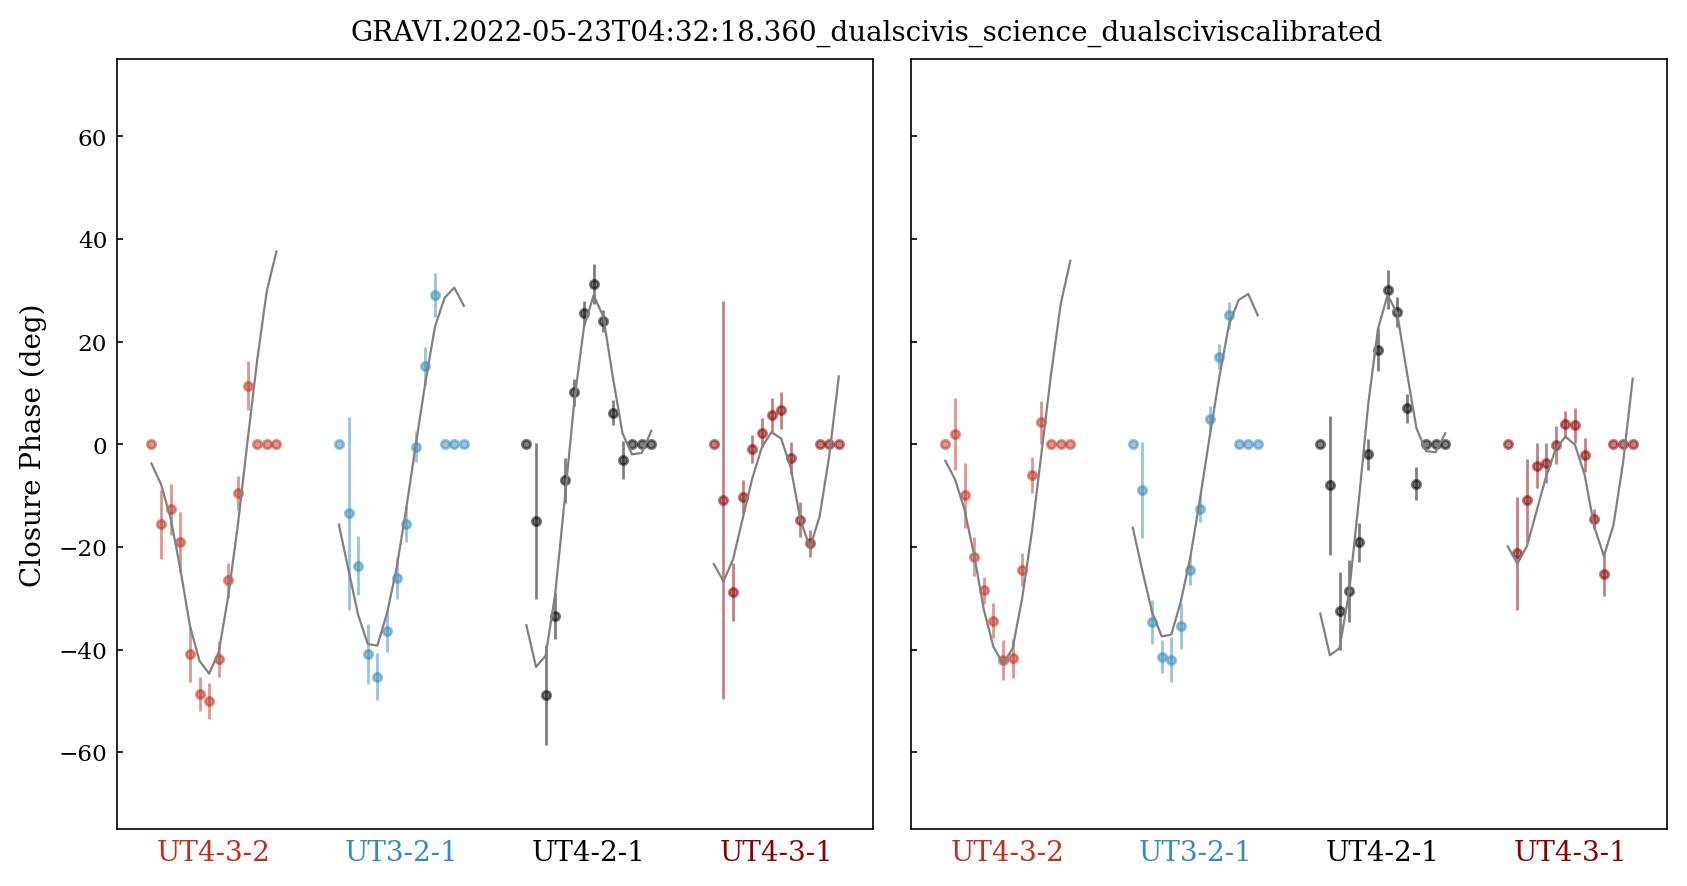

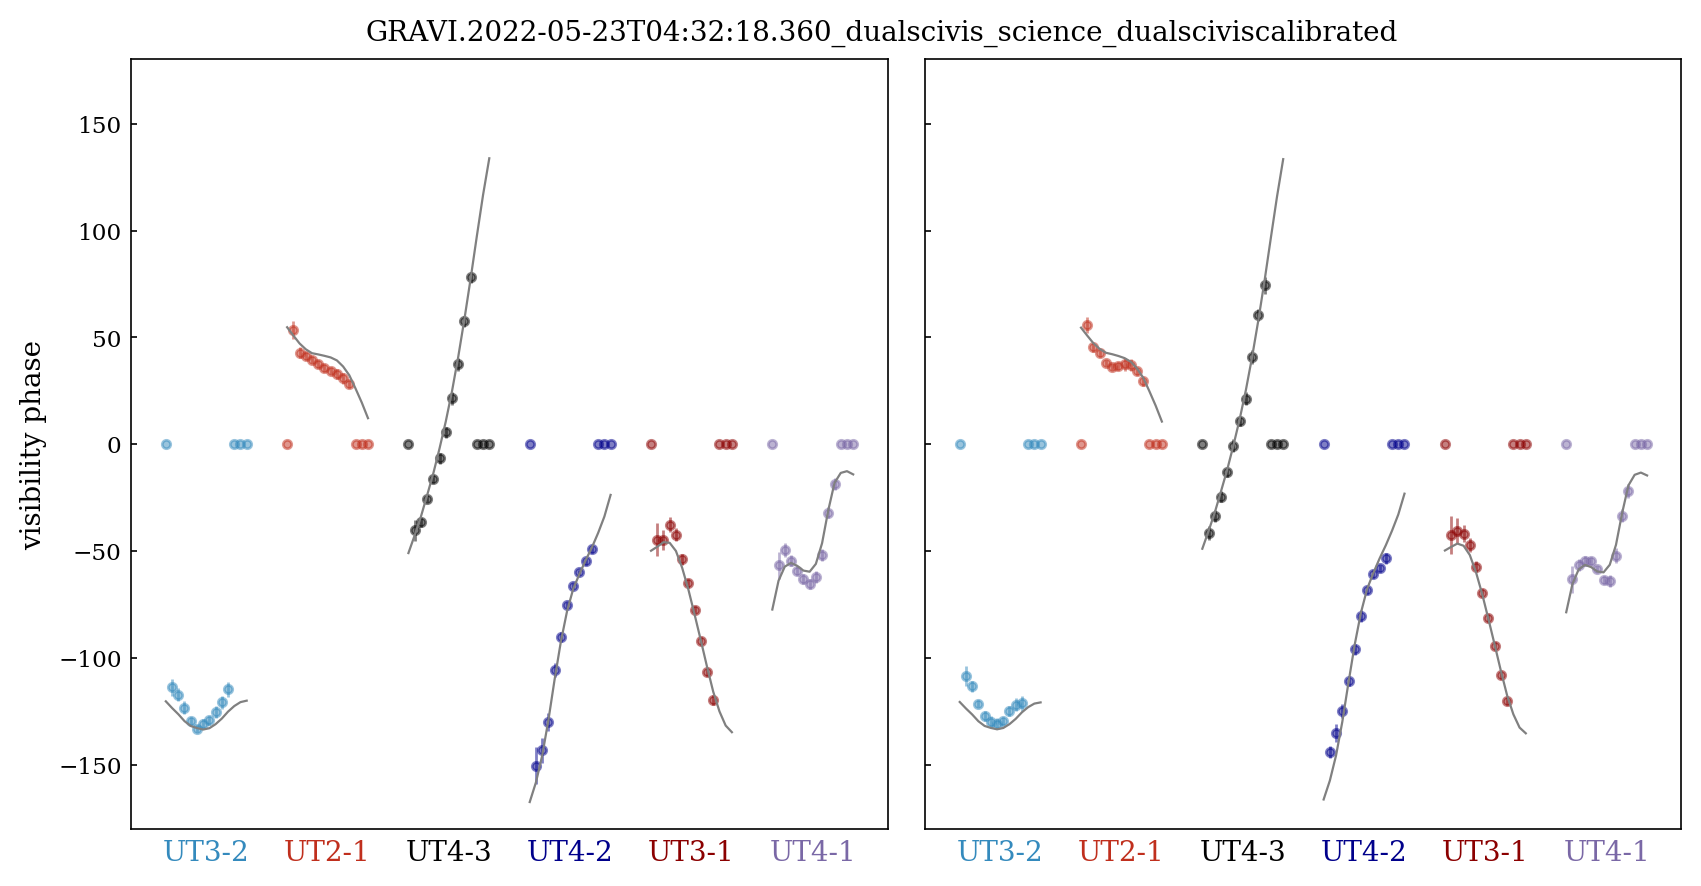

Combined red. chi2 of fitted data: 36.724


[array([-21.74945291, -16.06180428,   3.50403358,   0.58189693,
         15.47880596, -10.96948601,   0.43071297]),
 array([-21.64149852, -16.14895882,   3.37282095,   0.54221685,
         15.49306407, -10.99462219,   0.44477799])]

In [13]:
star_pos_ra = [sep[0]]  # list of RA of stars
star_pos_de = [sep[1]]  # list of Dec of stars
star_flux_ratio = []      # list of flux ratios relativ to first star, 1 shorter than other lists

fi = gp.GravMFit(f)
fi.fit_stars(
    star_pos_ra,
    star_pos_de,
    star_flux_ratio,
    fit_for=[1,1,1,1], # fitting for all quantities here: VisAmp, V2, Closure Phase, & Visibility Phase
    nthreads=4,
    nwalkers=100,
    nruns=150,
    initial=[3, 1,     # initial conditions for: alpha SgrA*, background flux ratio
             *pc,     # initial conditions for: Phase center Ra, Dec
             s60s24 , 1], # initial conditions for: background central/primary source, coherence loss
    plotScience=True)

In [14]:
fi.fittab

,column,dRA1,dDEC1,alpha BH,f BG,pc RA,pc Dec,fr BH,CL1,CL2,CL3,CL4,CL5,CL6,chi2
0,in P0_0,-21.688346,-15.074285,3.000000,1.000000,15.054836,-10.750057,-0.453358,1.0,1.0,1.0,1.0,1.0,1.0,6.471186
1,M.L. P0_0,-21.749453,-16.061804,3.504034,0.581897,15.478806,-10.969486,0.430713,1.0,1.0,1.0,1.0,1.0,1.0,7.630004
2,M.P. P0_0,-21.740755,-15.871060,2.875897,0.875738,15.476290,-10.975564,0.456445,1.0,1.0,1.0,1.0,1.0,1.0,1.736808
3,$-\sigma$ P0_0,0.194596,0.189690,0.228359,0.247139,0.375825,0.081393,0.767510,0.0,0.0,0.0,0.0,0.0,0.0,3.200226
4,$+\sigma$ P0_0,0.107870,0.811520,0.291815,0.500672,0.039897,0.186023,0.084152,0.0,0.0,0.0,0.0,0.0,0.0,NaN
5,in P1_0,-21.688346,-15.074285,3.000000,1.000000,15.054836,-10.750057,-0.453358,1.0,1.0,1.0,1.0,1.0,1.0,5.311485
6,M.L. P1_0,-21.641499,-16.148959,3.372821,0.542217,15.493064,-10.994622,0.444778,1.0,1.0,1.0,1.0,1.0,1.0,5.958978
7,M.P. P1_0,-21.787385,-15.657089,2.786039,0.769436,15.449106,-10.980377,0.461217,1.0,1.0,1.0,1.0,1.0,1.0,2.585232
8,$-\sigma$ P1_0,0.221863,0.442238,0.327382,0.285115,0.520515,0.053532,1.168758,0.0,0.0,0.0,0.0,0.0,0.0,3.830546
9,$+\sigma$ P1_0,0.142787,0.663838,0.403863,0.671684,0.087416,0.343620,0.145870,0.0,0.0,0.0,0.0,0.0,0.0,NaN
